# Setup

**Imports**

In [ ]:
pip install loadmydata

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for loadmydata: filename=loadmydata-0.0.10-py3-none-any.whl size=18029 sha256=0453e0ca384b4482ca49f53fcd86ca47a108bfefa0f4b834e7e45239da72308b
  Stored in directory: /root/.cache/pip/wheels/6b/c0/45/fbba10ccd037a6a95790143395becb128b59ff14ea71603af7
Successfully built loadmydata


In [ ]:
pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 6.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.metrics import dtw
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import sklearn
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list,
)

**Utility functions**

In [ ]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

**Global parameters**

In [ ]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Spectral feature

## Question 6

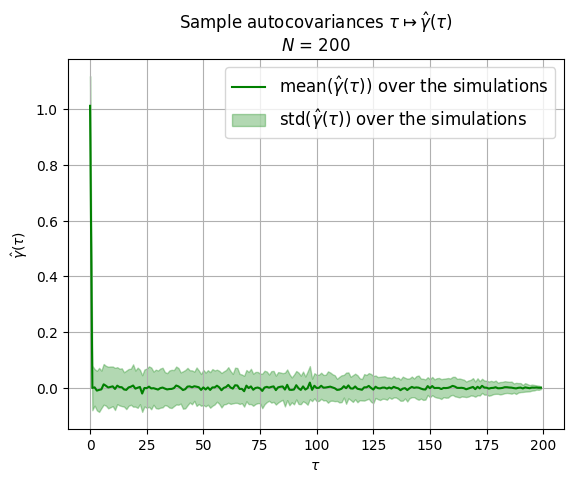

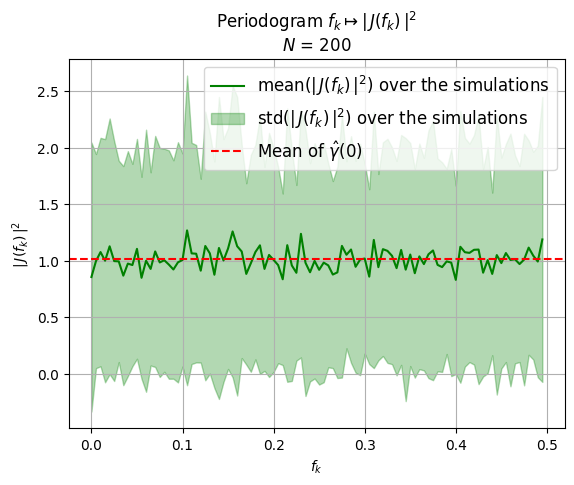

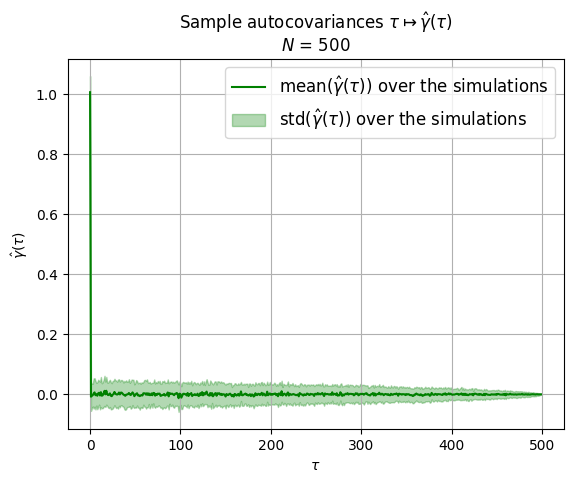

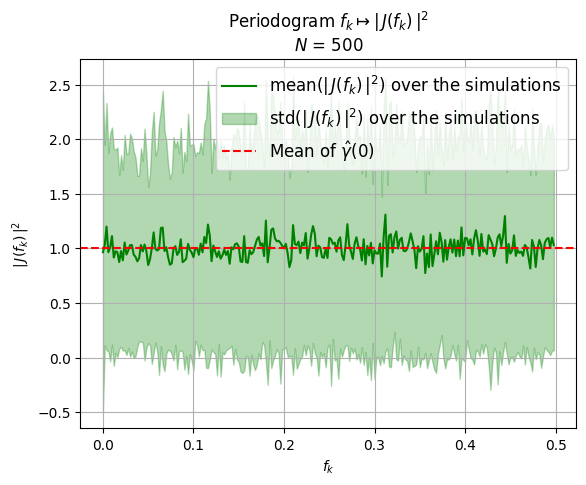

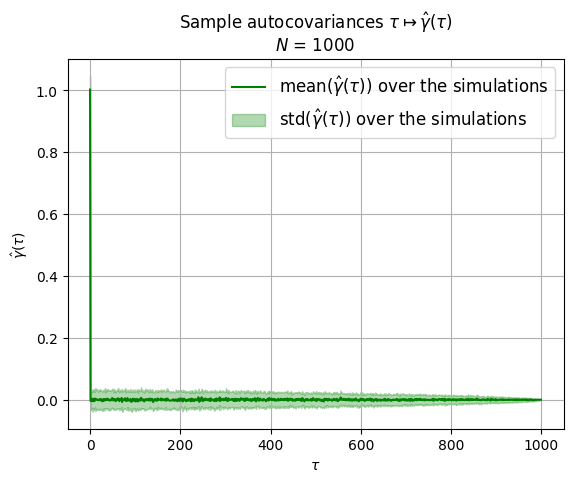

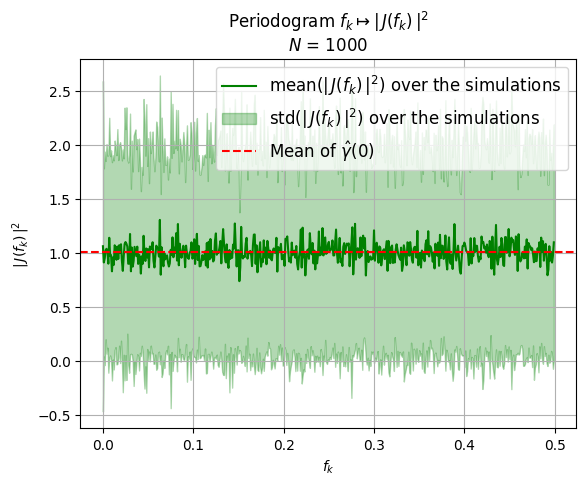

In [ ]:
n_sim = 100 # Number of simulations
fs = 1 #Hz

for N in [200, 500, 1000]:
  X = np.random.normal(size = (n_sim, N)) # Generate the dataset

  # First, compute and plot the sample autocovariances.
  sample_autocovariances = np.zeros((n_sim, N))

  for tau in range(N) :
    for n in range(N-tau):
      sample_autocovariances[:, tau] += 1/N * np.multiply(X[:, n],X[:, n+tau])

  means = sample_autocovariances.mean(0)
  stds = sample_autocovariances.std(0)

  plt.plot([tau for tau in range(N)], means, color = "green", label = "mean(" + r"$\hat{\gamma}(\tau)$" +") over the simulations")
  plt.fill_between(range(N), means-stds,means+stds,alpha=.3, color = "green", label = "std(" + r"$\hat{\gamma}(\tau)$" +") over the simulations")
  plt.title(r"Sample autocovariances $\tau \mapsto \hat{\gamma}(\tau)$" +  "\n$N$ = " + str(N))
  plt.xlabel(r'$\tau$')
  plt.ylabel(r"$\hat{\gamma}(\tau)$")
  plt.grid()
  plt.legend()
  plt.show()

  # Compute the periodogram
  f_vals = [fs*k/N for k in range(N // 2)]

  periodogram = np.zeros((n_sim, N // 2))

  for k, f_k in enumerate(f_vals) :
    for tau in range(1,N):
      periodogram[:, k] += 2*np.cos(2*np.pi*k*tau/N)*sample_autocovariances[:, tau]
    periodogram[:, k] += sample_autocovariances[:, 0]

  means = periodogram.mean(0)
  stds = periodogram.std(0)

  plt.plot(f_vals, means, color = "green", label = "mean(" + r"$|\,J(f_k)\,|^2$" + ") over the simulations")
  plt.fill_between(f_vals, means-stds,means+stds,alpha=.3, color = "green", label = "std(" + r"$|\,J(f_k)\,|^2$" + ") over the simulations")
  plt.axhline(y=sample_autocovariances[:, 0].mean(), color='r', linestyle='--', label = "Mean of " + r"$\hat{\gamma}(0)$")
  plt.title(r"Periodogram $f_k \mapsto |\,J(f_k)\,|^2$" +  "\n$N$ = " + str(N))
  plt.xlabel(r'$f_k$')
  plt.ylabel(r"$|\,J(f_k)\,|^2$")
  plt.grid()
  plt.legend()
  plt.show()

## Question 9

In [ ]:
n_sim = 100 # Number of simulations
fs = 1 #Hz
N = 200

In [ ]:
X = np.random.normal(size = (n_sim, N))

In [ ]:
np.array_split(X, 5, axis = 1)[0].shape

(100, 40)

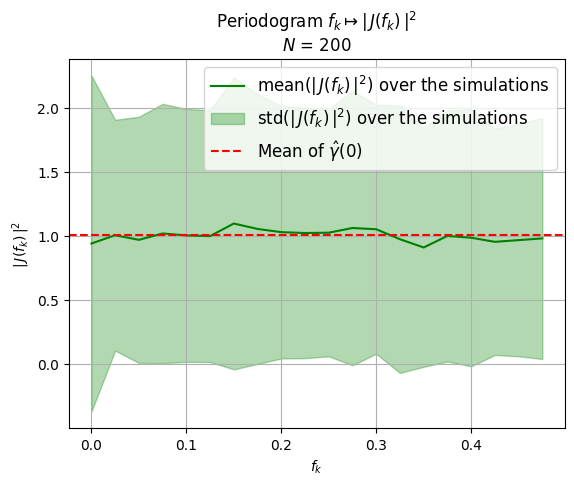

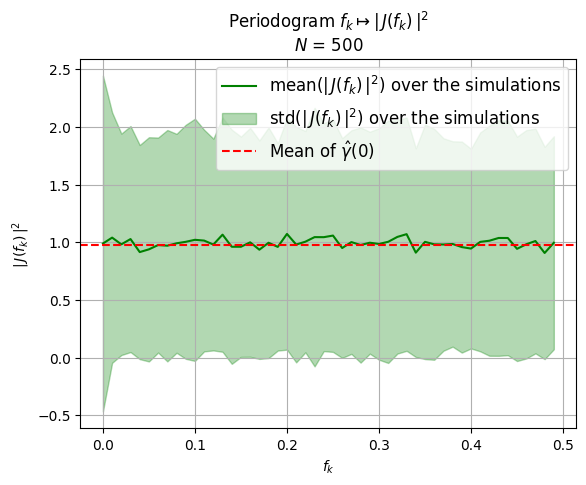

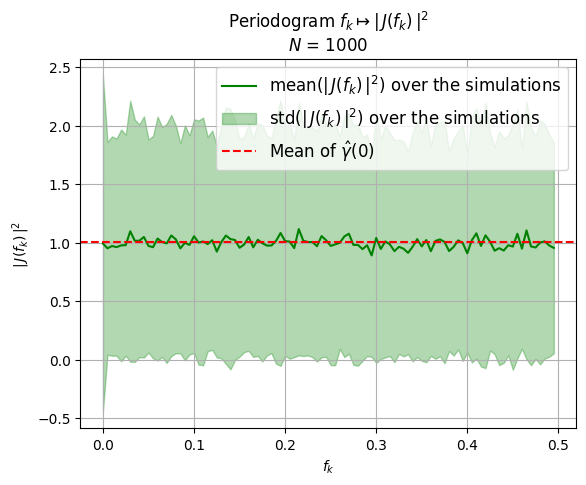

In [ ]:
n_sim = 100 # Number of simulations
fs = 1 #Hz

for N_tot in [200, 500, 1000]:

  means_by_part, stds_by_part = np.zeros(N_tot//10), np.zeros(N_tot//10)

  X_all = np.random.normal(size = (n_sim, N_tot)) # Generate the dataset

  X_split = np.array_split(X_all, 5, axis = 1)

  for X in X_split :

    N = X.shape[1]
    # First, compute and plot the sample autocovariances.
    sample_autocovariances = np.zeros((n_sim, N))

    for tau in range(N) :
      for n in range(N-tau):
        sample_autocovariances[:, tau] += 1/N * np.multiply(X[:, n],X[:, n+tau])

    means = sample_autocovariances.mean(0)
    stds = sample_autocovariances.std(0)

    # Compute the periodogram
    f_vals = [fs*k/N for k in range(N // 2)]

    periodogram = np.zeros((n_sim, N // 2))

    for k, f_k in enumerate(f_vals) :
      for tau in range(1,N):
        periodogram[:, k] += 2*np.cos(2*np.pi*k*tau/N)*sample_autocovariances[:, tau]
      periodogram[:, k] += sample_autocovariances[:, 0]

    means_by_part += periodogram.mean(axis = 0)
    stds_by_part += periodogram.std(axis = 0)

  means = means_by_part/5
  stds = stds_by_part/5

  plt.plot(f_vals, means, color = "green", label = "mean(" + r"$|\,J(f_k)\,|^2$" + ") over the simulations")
  plt.fill_between(f_vals, means-stds,means+stds,alpha=.3, color = "green", label = "std(" + r"$|\,J(f_k)\,|^2$" + ") over the simulations")
  plt.axhline(y=sample_autocovariances[:, 0].mean(), color='r', linestyle='--', label = "Mean of " + r"$\hat{\gamma}(0)$")
  plt.title(r"Periodogram $f_k \mapsto |\,J(f_k)\,|^2$" +  "\n$N$ = " + str(N_tot))
  plt.xlabel(r'$f_k$')
  plt.ylabel(r"$|\,J(f_k)\,|^2$")
  plt.grid()
  plt.legend()
  plt.show()

# Dynamic time warping (DTW)

## Data

This data set consists of signals collected with inertial measurement units (accelerometer+gyroscope), from 230 subjects undergoing a fixed protocol:
- standing still,
- walking 10 m,
- turning around,
- walking back,
- stopping.

In this assignment, we only consider the vertical acceleration of the left foot and all signals are truncated to 20 seconds (as a result, they all have same length). Signals are sampled at 100 Hz.

The measured population is composed of healthy subjects as well as patients with neurological or orthopedic disorders.

The start and end time stamps of thousands of footsteps are available.

The data are part of a larger data set described in [1].

[1] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9.

**The task** is to classify footsteps in healthy/non-healthy.

The following cell defines the training set `(X_train, y_train)` and testing set `(X_test, y_test)`.

In [ ]:
subset_indexes_train = [95, 619, 441, 149, 951, 803, 214, 34, 37, 630]
subset_indexes_test = [683, 259, 59, 387, 634]

code_list = get_code_list()

X_train = list()  # list of footstep signals
y_train = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_train):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_train.append(signal[start:end])
        y_train.append(label)


X_test = list()  # list of footstep signals
y_test = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_test):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_test.append(signal[start:end])
        y_test.append(label)

100%|██████████| 202M/202M [01:57<00:00, 1.71MiB/s]


## Question 10

First we compute the DTW distances between the inputs of the training data $X_{train}$. This gives us a distance matrix for the training phase of the KNN.

In [ ]:
num_samples = len(X_train)
dtw_distances_train = np.zeros((num_samples, num_samples))

for i in range(num_samples):
    for j in range(i, num_samples):
        dtw_dist = dtw(X_train[i], X_train[j])
        dtw_distances_train[i][j] = dtw_dist
        dtw_distances_train[j][i] = dtw_dist

We then compute the DTW distances between the test inputs $X_{test}$ and  the training inputs $X_{train}$. This second matrix will be used to make the predictions $y_{pred}$ over the test set.

In [ ]:
dtw_distances_test = np.zeros((len(X_test), len(X_train)))

for i in range(len(X_test)):
    for j in range(len(X_train)):
        dtw_dist = dtw(X_test[i], X_train[j])
        dtw_distances_test[i][j] = dtw_dist

#1/ Example of a KNN classifier with $k = 2$ neighbors.

Training phase

In [ ]:
k = 2
knn = KNeighborsClassifier(n_neighbors=k, metric = "precomputed")
knn.fit(dtw_distances_train, y_train)

KNeighborsClassifier(metric='precomputed', n_neighbors=2)

Prediction phase


In [ ]:
y_pred_train = knn.predict(dtw_distances_train)
y_pred_test = knn.predict(dtw_distances_test)

Computation of the scores

In [ ]:
print("The F1-score of the trained KNN on the training set is : ", sklearn.metrics.f1_score(y_train, y_pred_train), \
      "The F1-score of the trained KNN on the test set is : ", sklearn.metrics.f1_score(y_test, y_pred_test))

The F1-score of the trained KNN on the training set is :  0.9542483660130718 The F1-score of the trained KNN on the test set is :  0.4587155963302752


$\implies$ Naturally, the F1-score is higher for the training set than for the test set.

#2/ Cross-validation on the number of neighbors $k$.

In [ ]:
param_grid = {'n_neighbors': [i for i in range(1, 15)]} # Parameters k on which to perform the cross validation.

In [ ]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(dtw_distances_train, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='precomputed',
                                            n_neighbors=2),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             scoring='f1')

In [ ]:
best_params = grid_search.best_params_
best_f_score = grid_search.best_score_

In [ ]:
print("Optimal number of neighbors:", best_params['n_neighbors'])
print("Associated F-score:", best_f_score)

Optimal number of neighbors: 5
Associated F-score: 0.781814185073362


In [ ]:
k = best_params['n_neighbors']  # We perform the classificaiton with the optimal number of neighbors
knn = KNeighborsClassifier(n_neighbors=k, metric = "precomputed")
knn.fit(dtw_distances_train, y_train)

KNeighborsClassifier(metric='precomputed')

In [ ]:
y_pred = knn.predict(dtw_distances_test)

In [ ]:
print("The F1-score is : ", sklearn.metrics.f1_score(y_test, y_pred))

The F1-score is :  0.5132743362831859


## Question 11

In [ ]:
idx_healthy = None
idx_unhealthy = None

for i in range(len(y_pred)) :
  if (y_test[i] == 1) and (y_pred[i] == 0):
    idx_unhealthy = i
    break

for i in range(len(y_pred)) :
  if (y_test[i] == 0) and (y_pred[i] == 1):
    idx_healthy = i
    break

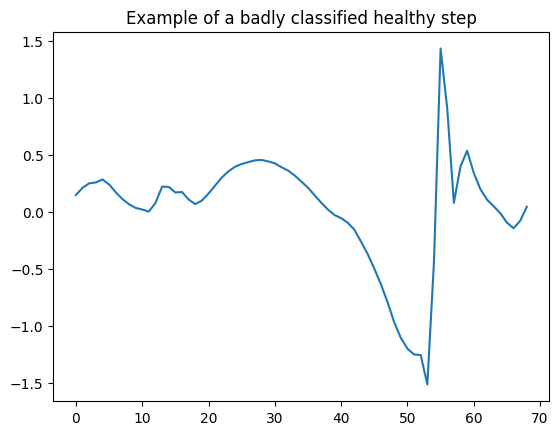

In [ ]:
plt.plot(X_test[idx_healthy])
plt.title("Example of a badly classified healthy step")
plt.show()

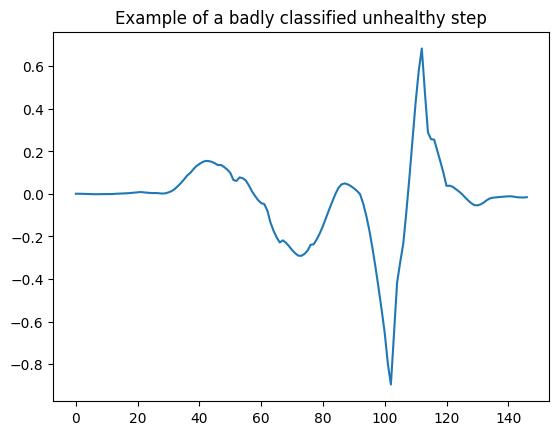

In [ ]:
plt.plot(X_test[idx_unhealthy])
plt.title("Example of a badly classified unhealthy step")
plt.show()